In [569]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [570]:
df = pd.read_csv('train.csv')

<Figure size 24000x12000 with 0 Axes>

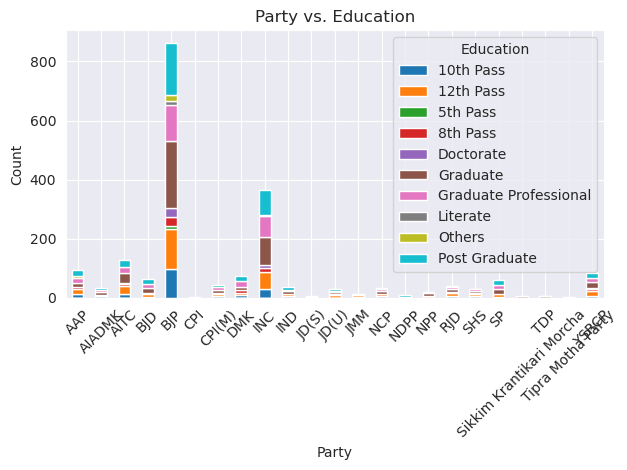

In [571]:
# Group the dataframe by Party and Education and count the occurrences
grouped = df.groupby(['Party', 'Education']).size().unstack(fill_value=0)

# Plot the grouped data
plt.figure(figsize=(240, 120))
grouped.plot(kind='bar', stacked=True)
plt.title('Party vs. Education')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

<Figure size 24000x12000 with 0 Axes>

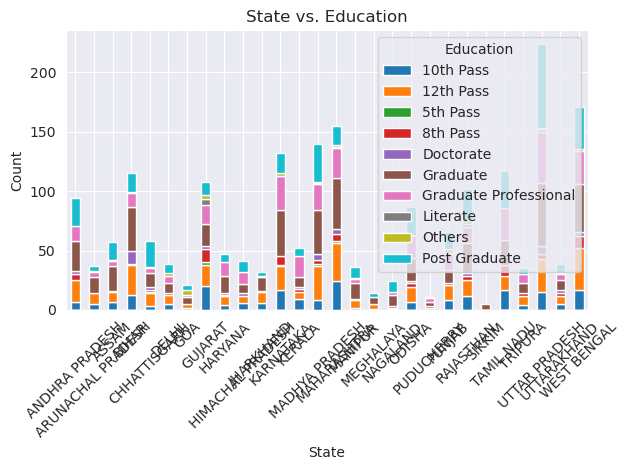

In [572]:
# Group the dataframe by Party and Education and count the occurrences
grouped = df.groupby(['state', 'Education']).size().unstack(fill_value=0)

# Plot the grouped data
plt.figure(figsize=(240, 120))
grouped.plot(kind='bar', stacked=True)
plt.title('State vs. Education')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

In [573]:
def convert_assets_liabilities(value):
    if '+' in value:
        number, unit = value.split(' ')
        number = float(number.replace(',', ''))
        if unit == 'Crore+':
            return float(number * 10000000.0)
        elif unit == 'Lac+':
            return float(number * 100000.0)
        elif unit == 'Thou+':
            return float(number * 1000.0)
        elif unit == 'Hund+':
            return float(number * 100.0)
        else:
            return float(number)
    else:
        return float(value.replace(',', ''))

def convert_constituency(value):
    if '(SC)' in value:
        return 'SC'
    elif '(ST)' in value:
        return 'ST'
    else:
        return 'GEN'

df['Total Assets'] = df['Total Assets'].apply(convert_assets_liabilities)
df['Liabilities'] = df['Liabilities'].apply(convert_assets_liabilities)
df['Constituency ∇'] = df['Constituency ∇'].apply(convert_constituency)


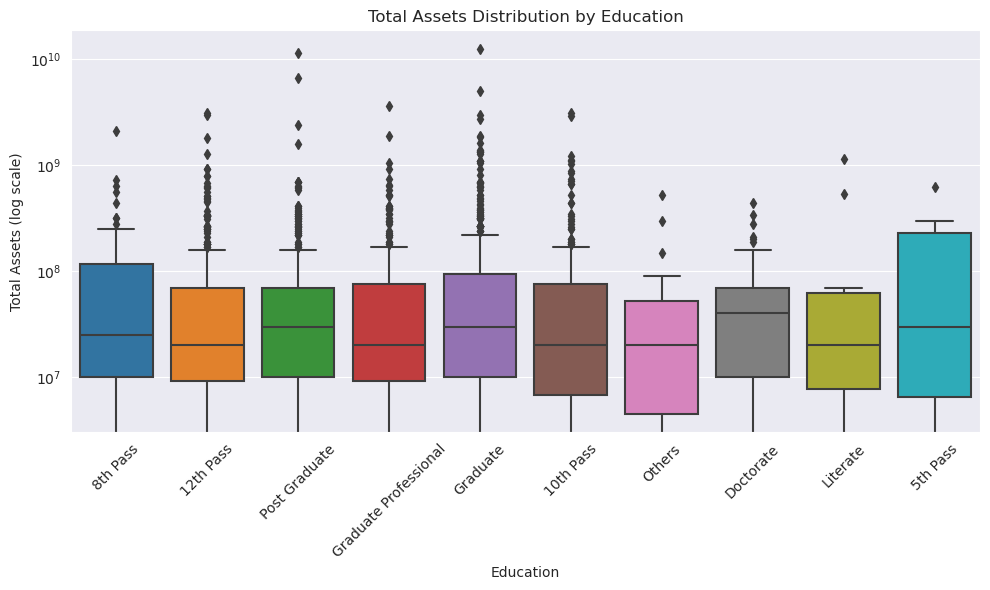

In [574]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Total Assets', data=df)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Total Assets Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Total Assets (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

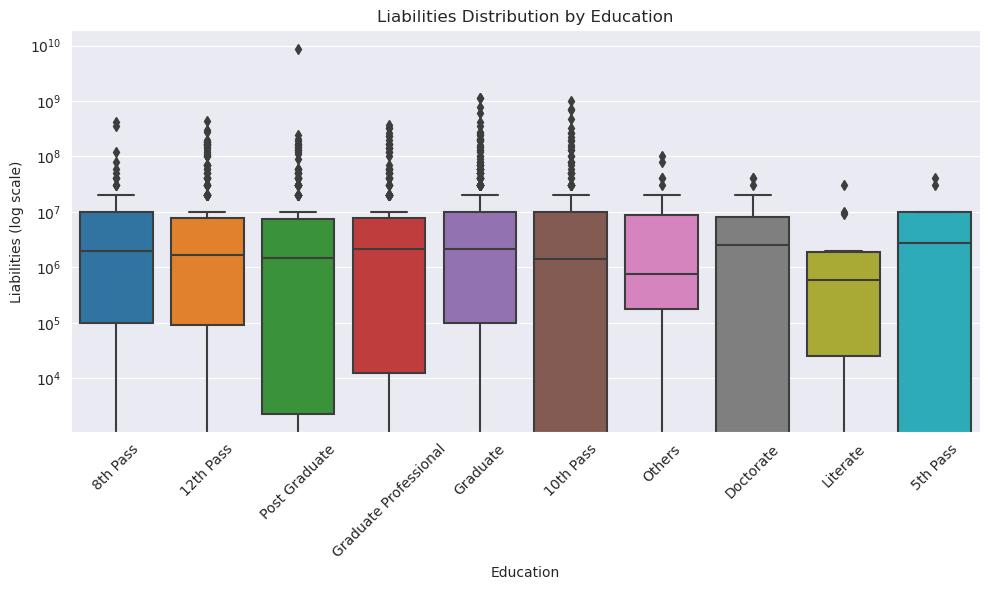

In [575]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Liabilities', data=df)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Liabilities Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Liabilities (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 24000x12000 with 0 Axes>

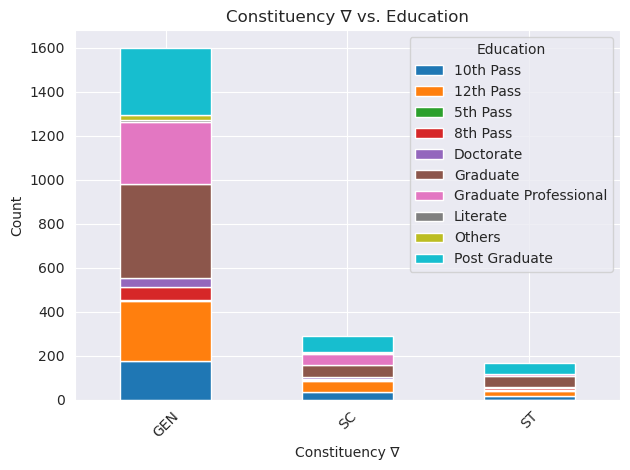

In [576]:
grouped = df.groupby(['Constituency ∇', 'Education']).size().unstack(fill_value=0)

# Plot the grouped data
plt.figure(figsize=(240, 120))
grouped.plot(kind='bar', stacked=True)
plt.title('Constituency ∇ vs. Education')
plt.xlabel('Constituency ∇')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

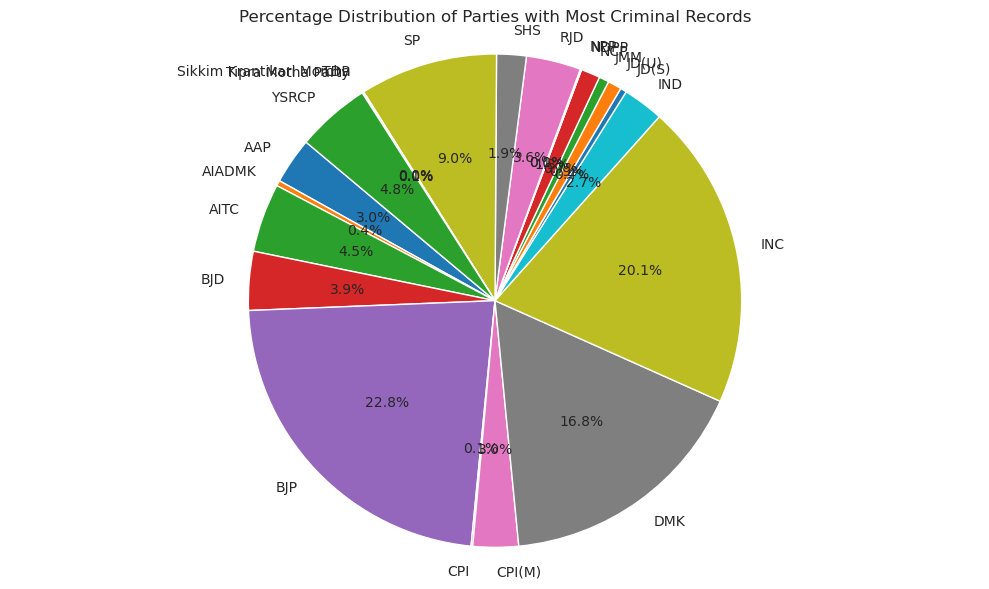

In [577]:
party_criminal_cases = df.groupby('Party')['Criminal Case'].sum()

# Calculate the percentage distribution
percentage_distribution = (party_criminal_cases / party_criminal_cases.sum()) * 100

# Plotting as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Parties with Most Criminal Records')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

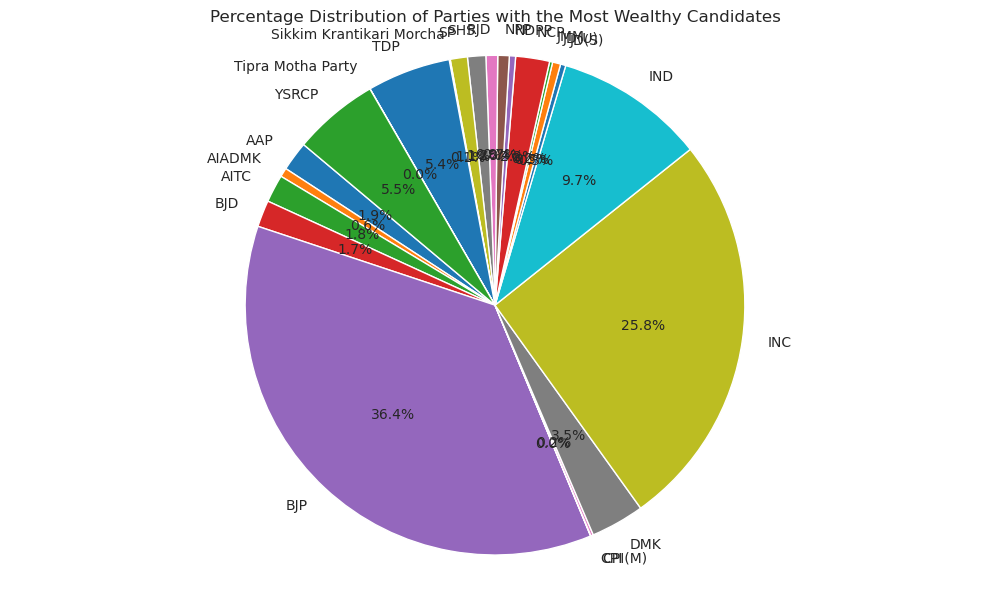

In [578]:
df['Wealth'] = df['Total Assets'] - df['Liabilities']

# Group by 'Party' and calculate the sum of 'Wealth' for each party
party_wealth = df.groupby('Party')['Wealth'].sum()

# Calculate the percentage distribution
percentage_distribution_wealth = (party_wealth / party_wealth.sum()) * 100

# Plotting as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(percentage_distribution_wealth, labels=percentage_distribution_wealth.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Parties with the Most Wealthy Candidates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [579]:
def string_to_int(value):
    if value == 'GEN':
        return 0
    elif value == 'SC':
        return 1
    else:
        return 2

df['Constituency ∇'] = df['Constituency ∇'].apply(string_to_int)

df = df.drop(columns=['ID', 'Candidate' ,'Total Assets', 'Liabilities'])
df = pd.get_dummies(df, columns=['Party', 'state'])

# df['Net']= df['Total Assets'] - df['Liabilities']

df.head(1000)

,Constituency ∇,Criminal Case,Education,Wealth,Party_AAP,Party_AIADMK,Party_AITC,Party_BJD,Party_BJP,Party_CPI,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,0,4,8th Pass,2.090000e+09,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,0,12th Pass,1.000000e+07,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,Post Graduate,6.780000e+07,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,Post Graduate,8.760000e+07,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,2,8th Pass,1.390000e+07,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,Post Graduate,1.970000e+07,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,1,0,Post Graduate,5.000000e+07,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,0,1,Graduate Professional,1.499750e+08,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,1,0,Post Graduate,1.410000e+07,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [580]:
has_nan = df.isna().any().any()

print(has_nan)

False


In [581]:
y = df['Education']
X = df.drop(columns=['Education'])

In [582]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

In [583]:
clf = BernoulliNB(alpha=0.5, binarize=0.1,fit_prior=True,class_prior=None)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_cv)

print(accuracy_score(y_cv, y_pred))
print(classification_report(y_cv, y_pred, zero_division=0))


0.22815533980582525
                       precision    recall  f1-score   support

            10th Pass       0.17      0.10      0.13        49
            12th Pass       0.12      0.06      0.08        67
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        20
            Doctorate       0.00      0.00      0.00        14
             Graduate       0.27      0.40      0.32       108
Graduate Professional       0.21      0.26      0.23        66
             Literate       0.00      0.00      0.00         3
               Others       0.00      0.00      0.00         4
        Post Graduate       0.23      0.31      0.27        80

             accuracy                           0.23       412
            macro avg       0.10      0.11      0.10       412
         weighted avg       0.19      0.23      0.20       412



In [584]:
test = pd.read_csv('test.csv')

test['Total Assets'] = test['Total Assets'].apply(convert_assets_liabilities)
test['Liabilities'] = test['Liabilities'].apply(convert_assets_liabilities)
test['Constituency ∇'] = test['Constituency ∇'].apply(convert_constituency)
test['Constituency ∇'] = test['Constituency ∇'].apply(string_to_int)

test['Wealth'] = test['Total Assets'] - test['Liabilities']

test = test.drop(columns=['ID', 'Candidate', 'Total Assets', 'Liabilities'])
test = pd.get_dummies(test, columns=['Party', 'state'])

y_pred = clf.predict(test)

df_result = pd.DataFrame({'ID': np.arange(len(y_pred)), 'Education': y_pred})

df_result.to_csv('output.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.
